<a href="https://colab.research.google.com/github/jukataaa/Titanic/blob/main/Titanicml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
train_feature = train_set.pop('Survived')
l_encoder = LabelEncoder()

In [3]:
test_set.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
def edit_columns(data_set):
  data_set['Level'] = data_set['Cabin'].str.get(0)
  data_set[['Lname', 'Fname']] =  data_set['Name'].str.split('.', n=1, expand = True )
  data_set[['Lname2', 'Title']] =  data_set['Lname'].str.split(',', expand = True )
  data_set.drop(columns = ['Lname', 'Fname', 'Lname2', 'Ticket', 'Name', 'Cabin', 'PassengerId'], inplace = True)
  return data_set

In [5]:
def replace_values(data_set):
  data_set['Sex'] = data_set['Sex'].replace(['male', 'female'], [2, 1])
  data_set['Embarked'] = data_set['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
  data_set['Title_cat'] = l_encoder.fit_transform(data_set['Title'])
  data_set['Level'] = data_set['Level'].fillna(value='N')
  data_set['Level_cat'] = l_encoder.fit_transform(data_set['Level'])
  data_set['Fare'] = pd.qcut(data_set['Fare'], 4, labels=False)
  return data_set

In [6]:
edit_columns(train_set)
replace_values(train_set)
edit_columns(test_set)
replace_values(test_set)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Level,Title,Title_cat,Level_cat
0,3,2,34.5,0,0,0.0,3,N,Mr,5,7
1,3,1,47.0,1,0,0.0,1,N,Mrs,6,7
2,2,2,62.0,0,0,1.0,3,N,Mr,5,7
3,3,2,27.0,0,0,1.0,1,N,Mr,5,7
4,3,1,22.0,1,1,1.0,1,N,Mrs,6,7
...,...,...,...,...,...,...,...,...,...,...,...
413,3,2,NaN,0,0,1.0,1,N,Mr,5,7
414,1,1,39.0,0,0,3.0,2,C,Dona,1,2
415,3,2,38.5,0,0,0.0,1,N,Mr,5,7
416,3,2,NaN,0,0,1.0,1,N,Mr,5,7


In [7]:
train_set.drop(columns=['Level', 'Title'], inplace=True)
test_set.drop(columns=['Level', 'Title'], inplace=True)
train_set['Age'] = train_set['Age'].fillna(value = train_set['Age'].mean())
train_set['Embarked'] = train_set['Embarked'].fillna(value = train_set['Embarked'].mean())

In [80]:
test_set['Age'] = train_set['Age'].fillna(value = train_set['Age'].mean())
test_set['Embarked'] = train_set['Embarked'].fillna(value = train_set['Embarked'].mean())

In [81]:
train_set.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_cat,Level_cat
0,3,2,22.0,1,0,0,1.0,11,7
1,1,1,38.0,1,0,3,2.0,12,2
2,3,1,26.0,0,0,1,1.0,8,7


In [9]:
dataset = tf.data.Dataset.from_tensor_slices((train_set.values, train_feature.values))

In [10]:
train_data = dataset.batch(1)

In [57]:
def get_model():
  model = keras.Sequential([
      keras.layers.Dense(50, activation='relu'),
      keras.layers.Dense(20, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')                      
  ])
  model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
  return model

In [58]:
model = get_model()

In [59]:
hisotry = model.fit(train_data, epochs=10)

Epoch 1/10
891/891 [==============================] - 2s 1ms/step - loss: 0.7332 - accuracy: 0.6277
Epoch 2/10
891/891 [==============================] - 1s 2ms/step - loss: 0.6018 - accuracy: 0.6866
Epoch 3/10
891/891 [==============================] - 1s 2ms/step - loss: 0.5689 - accuracy: 0.6955
Epoch 4/10
891/891 [==============================] - 1s 1ms/step - loss: 0.5424 - accuracy: 0.7112
Epoch 5/10
891/891 [==============================] - 1s 1ms/step - loss: 0.5187 - accuracy: 0.7621
Epoch 6/10
891/891 [==============================] - 1s 1ms/step - loss: 0.5024 - accuracy: 0.7731
Epoch 7/10
891/891 [==============================] - 1s 2ms/step - loss: 0.4952 - accuracy: 0.7790
Epoch 8/10
891/891 [==============================] - 1s 1ms/step - loss: 0.4896 - accuracy: 0.7870
Epoch 9/10
891/891 [==============================] - 1s 2ms/step - loss: 0.4823 - accuracy: 0.7856
Epoch 10/10
891/891 [==============================] - 1s 2ms/step - loss: 0.4785 - accuracy: 0.7776

In [65]:
test_results = pd.read_csv('gender_submission.csv')
test_results.drop(columns=['PassengerId'], inplace=True)

In [67]:
results = model.evaluate(test_set.values, test_results.values)

14/14 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7895


[nan, 0.7894737124443054]

In [82]:
predictions = model.predict(test_set.values)

In [ ]:
predictions = pd.DataFrame(predictions)
predictions = predictions.join(test_results)

In [106]:
predictions.rename(columns={0:'Prediction'}, inplace=True)

In [109]:
predictions[50:70]

,Prediction,Survived
50,0.487402,0
51,0.236358,0
52,0.342980,1
53,0.465073,1
54,0.181535,0
55,0.023802,0
56,0.099837,0
57,0.095744,0
58,0.510012,0
59,0.785823,1


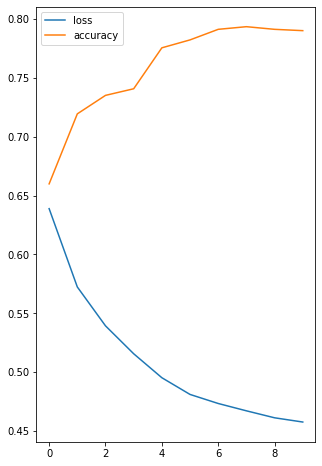

In [107]:
pd.DataFrame(hisotry.history).plot(figsize = (5, 8))